#**Lab 5: Integration**
**Sanskar Gupta**

#**Introduction**
This notebook contains various numerical and quadrature methods of integration , following methods will be implemented
  1. Function: 2-point Gauss quadrature over a unit interval 
  2. Function: 3-point edge midpoint quadrature over a reference triangle
  3. Function: Monte Carlo quadrature over a unit interval
  4. Function: Monte Carlo quadrature over a reference triangle


#**About the code**


In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Sanskar Gupta (sanskar@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

#**Environment Setup**


In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import sympy
import math
import unittest
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad, dblquad

#**Methods**

##**2-point Gauss quadrature over a unit interval**

From equation 11.4 in integration lecture notes we know that
$\sum_{j=0}^{n-1}\varphi_i(x_j)w_j = \int^b_a \varphi_i(x)dx$, for $i=0,...,q$

Here $b = 1$ and $a = -1$ as  it's a two point Gauss Quadrature. Also we set 
$n=$2 since we will be dealing with cubic polynomials

Following video was also referred to solve for $x$  and  $w$
https://www.youtube.com/watch?v=Hu6yqs0R7GA

$\varphi_0 = 1$

$\varphi_1 = x$

$\varphi_2 = x^2$

$\varphi_3 = x^3$

Hence we get an equation system:

$w_0 + w_1 = \int_{-1}^{1}1dx$

$x_0w_0 + x_1w_1 = \int_{-1}^{1}xdx$

$x_0^2w_0 + x_1^2w_1 = \int_{-1}^{1}x^2dx$

$x_0^3w_0 + x_1^3w_1 = \int_{-1}^{1}x^3dx$

We get:

$w_0 + w_1 - 2 = 0$

$x_0w_0 + x_1w_1 = 0$

$x^2_0w_0 + x^2_1w_1 - 2/3 = 0$

$x^3_0w_0 + x^3_1w_1 = 0$

If we solve the equation system we get:

$w_0 = w_1 = 1$

$x_0 = \frac{1}{\sqrt{3}}$

$x_1 = \frac{-1}{\sqrt{3}}$

This provides and exact approximation for polynomials of degree 3.

In [6]:
#Method
def twoPointGaussQuadrature(function, x):
  w0 = 1
  w1 = 1
  x0 = 1 / math.sqrt(3)
  x1 = -1 / math.sqrt(3)
  return w0 * function.subs(x,x0) + w1 * function.subs(x,x1) # just following the above derivation

In [7]:
#Test
from sympy import  Symbol, integrate
class TestGaussQuadrature(unittest.TestCase):
  def test(self):
    for i in range(100):
      # Setup
      a =  np.random.randint(0, 100)
      b =  np.random.randint(0, 100)
      c =  np.random.randint(0, 100)
      d =  np.random.randint(0, 100)
      x =  Symbol('x')
      function =  a*x**3 + b*x**2 + c*x + d
      expected_result = integrate(function, (x,-1, 1))

      # Act
      asserted_result = twoPointGaussQuadrature(function, x)

      # Assert
      self.assertAlmostEqual(expected_result, asserted_result)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 1.007s

OK


##**3-point edge midpoint quadrature over a reference triangle** 
Since we are woking in a two dimensional space, let's represent each point in the plane with $v = (x, y)$. This method is similar to the previous assignment, except that are domain has gone from $R$ to $R^2$. Our domain is a unit triangle, in other words, the triangle made from the points (0,0), (1,0), (0,1). The equation to solve is similar to the one we used in the previous assignment:

$\sum_{j=0}^{n-1}\varphi_i(x_j)w_j = \int^b_a \varphi_i(x)dx$, for $i=0,...,q$

But with the only difference that we are using it in $R^2$, hence we get:

$\sum_{j=0}^{n-1}\varphi_i(v_j)w_j = \int_D \varphi_i(v)dx$, for $i=0,...,q$ 

where $D$ is our domain to integrate over. Our basis to the problem is the following:

$\varphi_0(v) = 1$

$\varphi_1(v) = x$

$\varphi_2(v) = y$

$\varphi_3(v) = xy$

$\varphi_4(v) = x^2$

$\varphi_5(v) = y^2$

Which gives us $q = 5$

By solving the equation above, we get the following values.

$w_0 = 1/6$

$w_1 = 1/6$

$w_2 = 1/6$

$x_0 = 0$

$y_0 = 0.5$

$x_1 = 0.5$

$y_1 = 0.5$

$x_2 = 0.5$

$y_2 = 0.5$

These $w$ values are motivated the same way as example 11.5 from the lecture notes. Since the points are placed on the middle of its edge, and all edges are equally long, this symmetry give us that all $w$ values will be the same.


In [8]:
def threePointEdgeQuadratureOverTriangle(function, x, y):
  w0 = 1 / 6
  w1 = 1 / 6
  w2 = 1 / 6
  x0 = 0
  y0 = 0.5
  x1 = 0.5
  y1 = 0 
  x2 = 0.5
  y2 = 0.5
  return function.subs({y:y0, x:x0}) * w0 + function.subs({y:y1, x:x1}) * w1 + function.subs({y:y2, x:x2}) * w2

In [11]:
class TestThreePointEdgeQuadrature(unittest.TestCase):
  def test(self):
    for i in range(100):
      # Setup
      a =  np.random.randint(0, 100)
      b =  np.random.randint(0, 100)
      c =  np.random.randint(0, 100)
      d =  np.random.randint(0, 100)
      e =  np.random.randint(0, 100)
      f =  np.random.randint(0, 100)
      x =  Symbol('x')
      y =  Symbol('y')
      function = a*x**2 + b*y**2 + c*x*y + d*x + e*y + f 
      triangleEquation = 1-x
      expected_result = integrate(function, (y, 0, triangleEquation), (x, 0, 1))
      print('expected_result', expected_result)

      asserted_result = threePointEdgeQuadratureOverTriangle(function, x, y)

      # Assert
      self.assertAlmostEqual(expected_result, asserted_result)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

expected_result 1645/24
expected_result 1033/24
expected_result 1513/24
expected_result 727/24
expected_result 595/12
expected_result 172/3
expected_result 655/24
expected_result 627/8
expected_result 85
expected_result 469/12
expected_result 319/12
expected_result 189/4
expected_result 755/12
expected_result 1127/24
expected_result 593/24
expected_result 485/8
expected_result 49/3
expected_result 1493/24
expected_result 1333/24
expected_result 347/8
expected_result 1985/24
expected_result 1619/24
expected_result 1495/24
expected_result 305/12
expected_result 1051/24
expected_result 166/3
expected_result 217/3
expected_result 367/8
expected_result 1403/24
expected_result 1375/24
expected_result 55
expected_result 1891/24
expected_result 331/8
expected_result 505/12
expected_result 569/8
expected_result 211/4
expected_result 1691/24
expected_result 411/8
expected_result 775/12
expected_result 631/12
expected_result 937/24
expected_result 68
expected_result 143/6
expected_result 239/6
ex

.

expected_result 40/3
expected_result 2117/24
expected_result 2119/24
expected_result 237/4
expected_result 97/2



----------------------------------------------------------------------
Ran 2 tests in 3.655s

OK


##**Monte Carlo quadrature over a unit interval**
In  Monte-Carlo quadrature the algorithm randomly picks a value from the interval and evaluates the function at this point. It does this n times, where n is the number of quadrature points. After the summation average value is returned.

In [14]:
def monteCarloQuadrature(function, nPoints, x):
  return sum([function.subs(x,np.random.uniform()) for _ in range(nPoints)])/nPoints

.

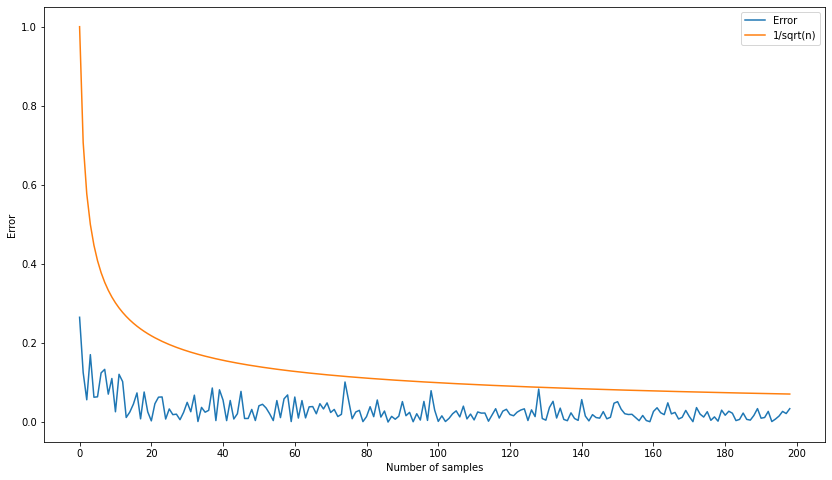

.

expected_result 373/6
expected_result 215/6
expected_result 521/8
expected_result 325/6
expected_result 463/12
expected_result 513/8
expected_result 1501/24
expected_result 1117/24
expected_result 283/8
expected_result 241/3
expected_result 1265/24
expected_result 907/12
expected_result 439/8
expected_result 181/4
expected_result 1879/24
expected_result 157/3
expected_result 1541/24
expected_result 1211/24
expected_result 1511/24
expected_result 327/4
expected_result 151/8
expected_result 1249/24
expected_result 28
expected_result 113/4
expected_result 1643/24
expected_result 815/24
expected_result 1123/24
expected_result 671/12
expected_result 403/6
expected_result 499/8
expected_result 143/3
expected_result 154/3
expected_result 1619/24
expected_result 621/8
expected_result 317/6
expected_result 707/24
expected_result 481/8
expected_result 271/12
expected_result 135/8
expected_result 647/8
expected_result 43
expected_result 215/4
expected_result 1219/24
expected_result 1585/24
expect

.

expected_result 1417/24
expected_result 1079/24
expected_result 1483/24
expected_result 1087/24



----------------------------------------------------------------------
Ran 3 tests in 7.489s

OK


In [15]:
#Test

class TestMonteCarloQuadrature(unittest.TestCase):
  def test(self):
    x= Symbol('x')
    function = x**2
    expected_result = integrate(function,(x, 0, 1))
    t = np.arange(1., 100., 1.0)
    errors = []
    squares = []
    for n in range(1, 200):
      squares.append(1/math.sqrt(n))
      errors.append(abs(expected_result - monteCarloQuadrature(function, n, x)))
    plt.figure(figsize=(14,8))
    plt.plot(errors, label="Error")
    plt.plot(squares, label="1/sqrt(n)")
    plt.legend(loc="upper right")
    plt.xlabel("Number of samples")
    plt.ylabel("Error")
    plt.xticks(range(0,200+1,200//10))
    plt.show()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

##**Monte Carlo quadrature over a reference triangle**
Simlar to Monte Carlo quadrature over a unit interval, the only difference now is that we go from  R  to  R2 , and our  D  is the unit triangle (the triangle made of (0,0), (1,0), (0,1)). We can use the same formula used in the previous assignments.

∫Dg(x)≈1n∑ni=1g(xi)|D|=|D|n∑ni=1g(xi) 

The only major difference is that  x  is an vector with two components. We also need to pick random datapoints uniformly from the unit triangle.


In [16]:
def monte_carlo_quadrature_triangle(function, nPoints):
  summation = 0
  for _ in range(nPoints):
      x = np.random.uniform()
      y = np.random.uniform()
      while y > 1-x:
          x = np.random.uniform()
          y = np.random.uniform()
      summation += function(x,y)
  return summation*(0.5/nPoints)

.

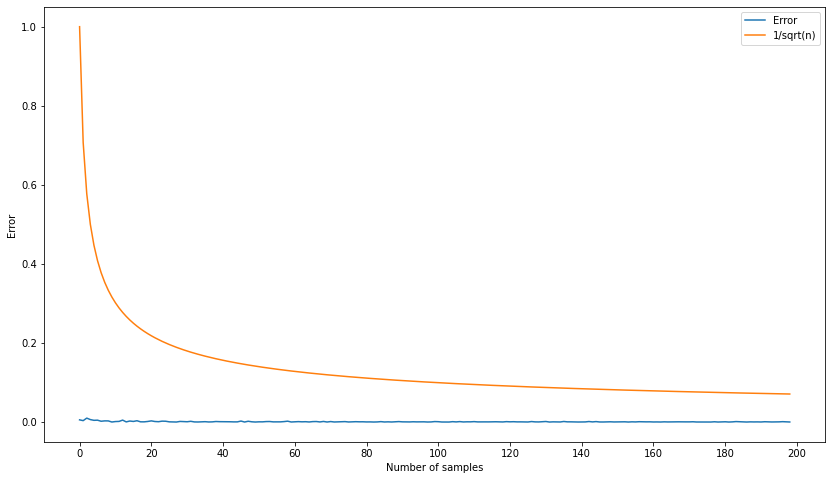

.

expected_result 555/8
expected_result 947/24
expected_result 191/3
expected_result 329/8
expected_result 377/12
expected_result 167/4
expected_result 135/4
expected_result 395/6
expected_result 821/12
expected_result 1373/24
expected_result 985/24
expected_result 815/12
expected_result 225/4
expected_result 122/3
expected_result 679/12
expected_result 91/2
expected_result 251/4
expected_result 133/3
expected_result 649/12
expected_result 1303/24
expected_result 1243/24
expected_result 197/6
expected_result 269/8
expected_result 701/24
expected_result 493/8
expected_result 146/3
expected_result 499/8
expected_result 887/12
expected_result 191/4
expected_result 1351/24
expected_result 1679/24
expected_result 697/12
expected_result 343/12
expected_result 291/4
expected_result 333/8
expected_result 665/12
expected_result 869/12
expected_result 37
expected_result 257/4
expected_result 104/3
expected_result 733/12
expected_result 331/6
expected_result 127/4
expected_result 106/3
expected_res

.

expected_result 979/24
expected_result 283/12
expected_result 1607/24
expected_result 485/8
expected_result 181/3
expected_result 209/4
expected_result 1021/24
expected_result 1457/24
expected_result 101/2



----------------------------------------------------------------------
Ran 3 tests in 3.915s

OK


In [18]:
#Test
class TestMonteCarloQuadrature(unittest.TestCase):
  def test(self):
    function = lambda x, y: x**2*y**2
    lower_limit = lambda x: 0
    triangleEquation = lambda x: 1-x
    expected_result = dblquad(function, 0, 1, lower_limit, triangleEquation)[0]  
    errors = []
    squares = []
    for n in range(1, 200):
      squares.append(1/math.sqrt(n))
      errors.append(abs(expected_result - monte_carlo_quadrature_triangle(function, n)))
    plt.figure(figsize=(14,8))
    plt.plot(errors, label="Error")
    plt.plot(squares, label="1/sqrt(n)")
    plt.legend(loc="upper right")
    plt.xlabel("Number of samples")
    plt.ylabel("Error")
    plt.xticks(range(0,200+1,200//10))
    plt.show()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


#**Discussion**
All unit tests passed successfully proving the fact that numerical integration can be useful at times
 The convergence rate follows the curve 1/sqrt(n) and the error becomes less with the increase in number of samples.